In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import cv2 as cv
import numpy as np # linear algebra
import matplotlib.pyplot as plt 
from tensorflow.keras import datasets , layers , models

(training_images,training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()
training_images, testing_images = training_images/255, testing_images/255


2024-03-09 21:32:35.870563: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-09 21:32:35.870682: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-09 21:32:36.009309: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/tmp/ipykernel_26/1841625149.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(training_labels[i])


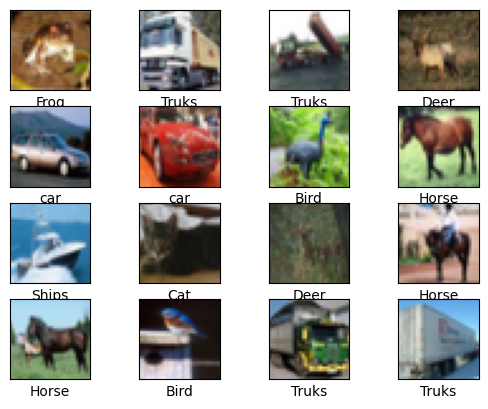

In [2]:
class_names = ['plane', 'car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ships', 'Truks']

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    
    # Convert training_labels[i] to integer before using it as an index
    label_index = int(training_labels[i])
    
    plt.xlabel(class_names[label_index])

plt.show()


In [3]:
##to train fast and save time but accuarcey wont be good 
training_images = training_images[:20000]
training_labels = training_labels[:20000]
testing_images = testing_images [:4000]
testing_labels = testing_labels[:4000]

In [4]:
model = models.Sequential()
#  the first convolutional layer for learning low-level features such as edges and textures
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

#  max pooling layer reduces the spatial dimensions, preserving the most important information 
model.add(layers.MaxPooling2D((2, 2)))

# The second Convolutional layer learns higher-level features.
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# max pooling layer with a 2x2 pool size
model.add(layers.MaxPooling2D((2, 2)))

#The third layer further refines the features learned by the model.
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# This layer transforms the 3D output of the convolutional layers into a 1D array. 
model.add(layers.Flatten())

# This layer takes the flattened output and introduces more complex relationships between features.
model.add(layers.Dense(64, activation='relu'))

# the output layer with 10 units and 'softmax' activation
model.add(layers.Dense(10, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [5]:


# Compile the model (in metrics part we add the metrics that we are intrested to know )
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images, testing_labels))


Epoch 1/10


2024-03-09 21:32:58.991520: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1809: 6.57455, expected 5.77917
2024-03-09 21:32:58.991582: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1873: 6.94706, expected 6.15168
2024-03-09 21:32:58.991593: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1874: 6.59592, expected 5.80054
2024-03-09 21:32:58.991602: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1877: 6.39789, expected 5.60251
2024-03-09 21:32:58.991611: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1950: 6.58588, expected 5.7905
2024-03-09 21:32:58.991620: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1970: 6.0549, expected 5.25952
2024-03-09 21:32:58.991629: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1982: 6.81896, expected 6.02358
2024-03-09 21:32:58.991638: E extern

 60/625 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1382 - loss: 2.2899

I0000 00:00:1710019981.108029      73 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2689 - loss: 1.9654 - val_accuracy: 0.4480 - val_loss: 1.5212
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4786 - loss: 1.4350 - val_accuracy: 0.4818 - val_loss: 1.4246
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5405 - loss: 1.2919 - val_accuracy: 0.5575 - val_loss: 1.2305
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5868 - loss: 1.1708 - val_accuracy: 0.5750 - val_loss: 1.2066
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6154 - loss: 1.0793 - val_accuracy: 0.6100 - val_loss: 1.1091
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6502 - loss: 1.0006 - val_accuracy: 0.6040 - val_loss: 1.1403
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6771 - loss: 0.9308 - val_accuracy: 0.6275 - val_loss: 1.0670
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6993 - loss: 0.8650 - val_accuracy: 0.6330 - val_

In [6]:


# Evaluate the model on the testing data
loss, accuracy = model.evaluate(testing_images, testing_labels)

# Print the evaluation results
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

# Save the model
# Save the model with a valid filepath extension
model.save('image_classifier_model.h5')
model = models.load_model('image_classifier_model.h5')


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6287 - loss: 1.1130
Loss: 1.121711254119873
Accuracy: 0.625249981880188


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
Prediction is plane


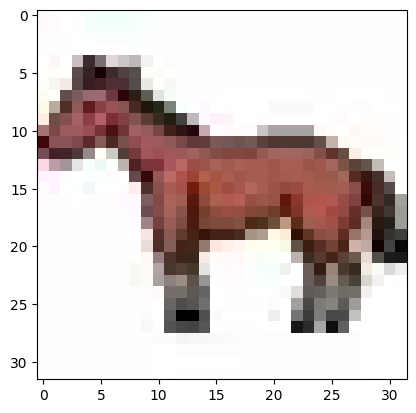

In [7]:

# Load and preprocess the image
img = cv.imread('/kaggle/input/horset/vector-pixel-art-horse-isolated-cartoon-138420531.jpg_32x32.webp')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Display the image
plt.imshow(img, cmap=plt.cm.binary)


# Make a prediction
prediction = model.predict(np.array([img])/ 255)

# Get the index of the predicted class
index = np.argmax(prediction)

# Print the predicted class
print(f'Prediction is {class_names[index]}')